# Spotify Model

**1. Classification Model for Predicting Popularity**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_parquet(r"0000 (1) (2).parquet")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
df['key'].unique()

array([ 1,  0,  2,  6, 11,  8,  4,  7,  3, 10,  5,  9], dtype=int64)

In [8]:
df=pd.read_parquet(r"0000 (1) (2).parquet")
df.to_csv("Spotify_pred_Dataset.csv")

In [9]:
df = pd.read_csv(r"Spotify_pred_Dataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [10]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'track_id', 'artists', 'album_name',
       'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [11]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [12]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [13]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Data Preprocessing

In [14]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [15]:
df = df.dropna(subset=['artists','album_name','track_name'])

In [16]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration_ms')]

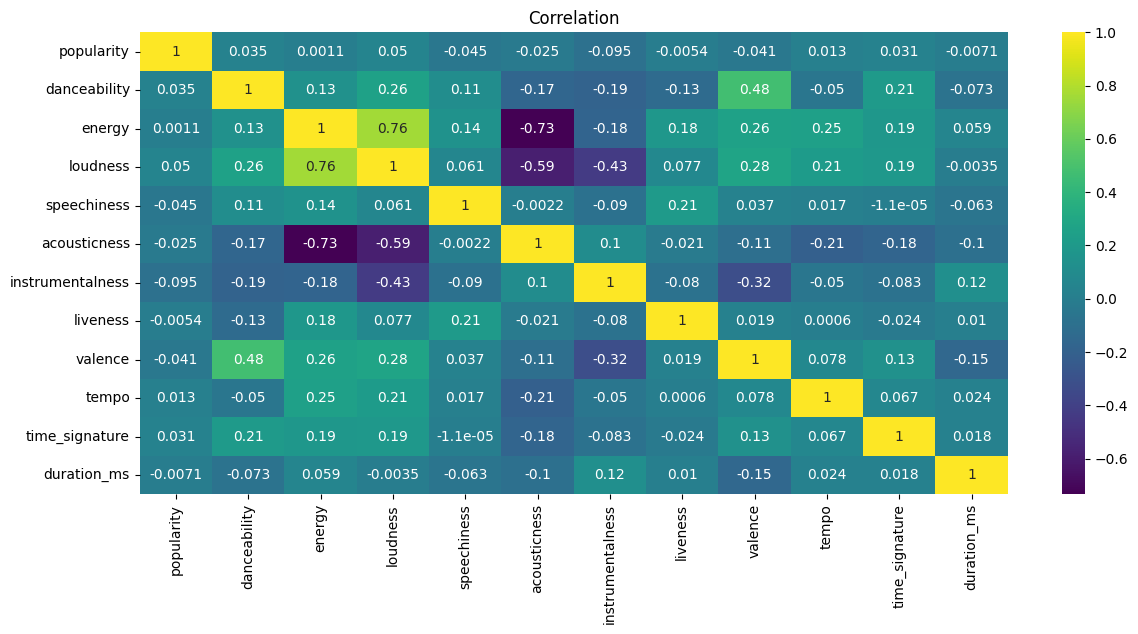

In [17]:
plt.figure(figsize=(14,6))
heatmap=df[['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']].corr(method='pearson')
heatmap_graph=sns.heatmap(heatmap, annot=True, cmap="viridis")
heatmap_graph.set_title("Correlation")
heatmap_graph.set_xticklabels(heatmap_graph.get_xticklabels(),rotation=90)

[Text(0.5, 1.0, 'Correlation Between Loudness and Energy')]

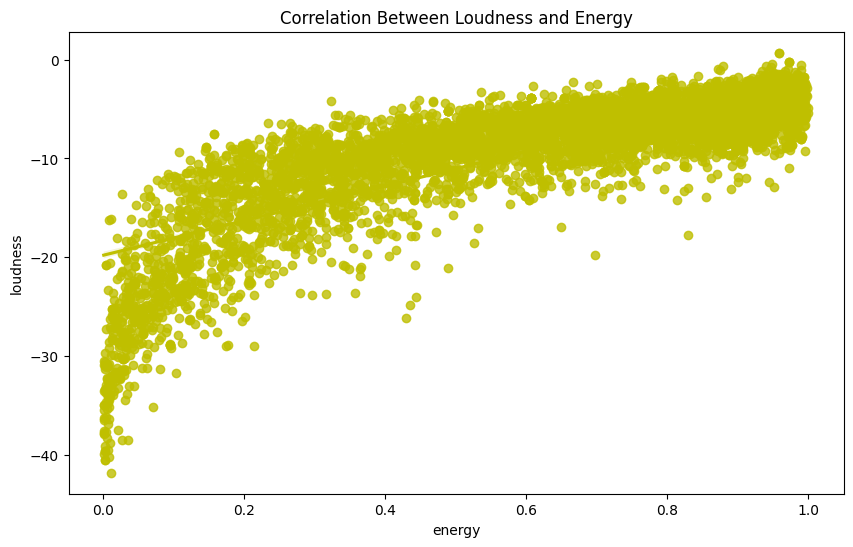

In [18]:
sample_df=df.head(6500)
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y='loudness', x='energy', color='y').set(title='Correlation Between Loudness and Energy')

[Text(0.5, 1.0, 'Correlation Between Valence and Danceability')]

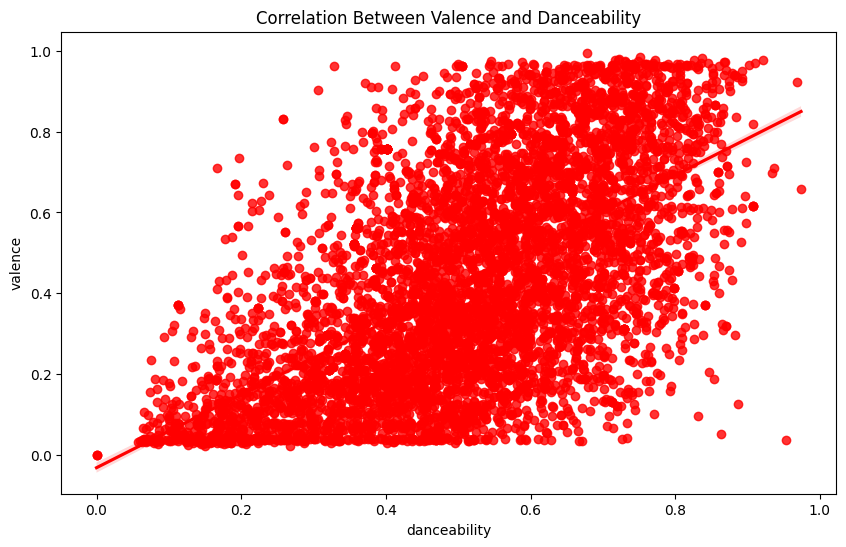

In [19]:
sample_df=df.head(6500)
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y='valence', x='danceability', color='r').set(title='Correlation Between Valence and Danceability')

In [20]:
X = df[['duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = df['popularity']

In [21]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Feature Engineering

In [22]:
# duration_ms, danceability, energy, 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'

In [23]:
# loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo', 'time_signature'

In [24]:
df['duration_seconds'] = df['duration_ms'] / 1000

In [25]:
columns_to_check = ['danceability', 'energy', 'acousticness', 'valence']
for column in columns_to_check:
    invalid_values = df[(df[column] < 0) | (df[column] > 1)]
    if not invalid_values.empty:
        print(f"Invalid values in '{column}':")
        print(invalid_values)
        df.loc[(df[column] < 0) | (df[column] > 1), column] = None

print(df)

                      track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...  

In [26]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_seconds
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,228.031153
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,107.296058
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.586000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,174.066000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,212.906000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,261.506000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,5237.295000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

loudness', 'tempo', 'time_signature'

In [28]:
df['time_signature'].unique()

array([4, 3, 1, 5, 0], dtype=int64)

# Handling Outliers in Loudness, Tempo

C:\Users\31syl\AppData\Local\Temp\ipykernel_35804\1606962858.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0,1], a=df['loudness'])
C:\Users\31syl\AppData\Local\Temp\ipykernel_35804\1606962858.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1,1], a=df['tempo'])


Text(0.5, 1.0, 'Tempo - Skewness')

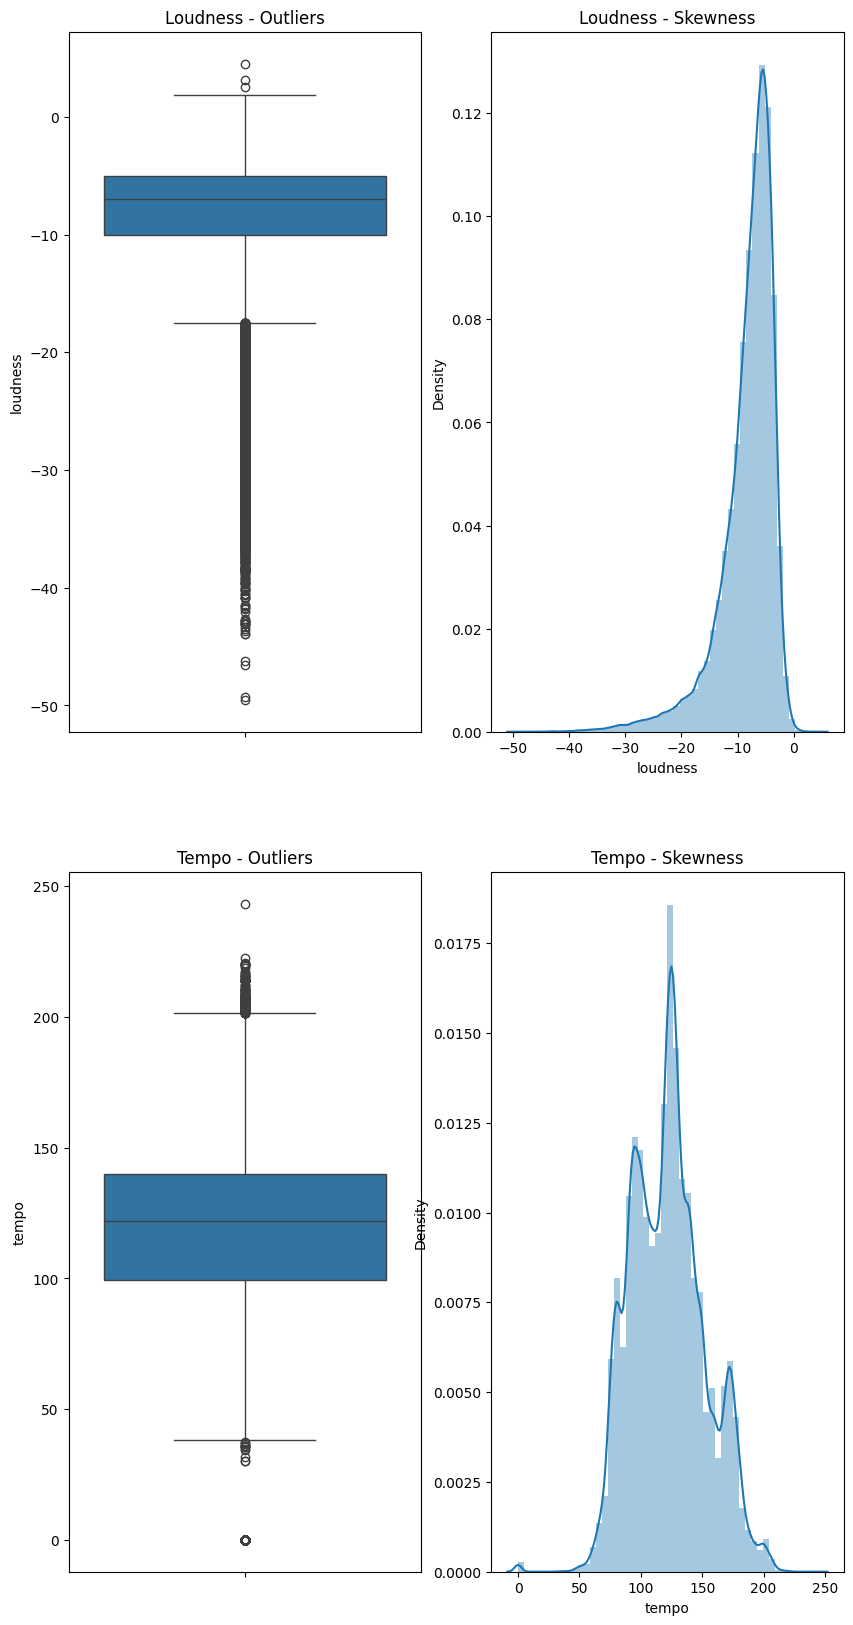

In [29]:
fig,axes = plt.subplots(2,2, figsize=(10,20))

# Loudness
sns.boxplot(ax=axes[0,0], data = df['loudness'])
axes[0,0].set_title('Loudness - Outliers')
sns.distplot(ax=axes[0,1], a=df['loudness'])
axes[0,1].set_title('Loudness - Skewness')

# Tempo
sns.boxplot(ax=axes[1,0], data=df['tempo'])
axes[1,0].set_title('Tempo - Outliers')
sns.distplot(ax=axes[1,1], a=df['tempo'])
axes[1,1].set_title('Tempo - Skewness')

In [30]:
# Loudness
Q1 = df['loudness'].quantile(0.25)
Q3 = df['loudness'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['loudness'] = df['loudness'][(df['loudness'] >= lower_bound) & (df['loudness'] <= upper_bound)]

In [31]:
# Tempo
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['tempo'] = df['tempo'][(df['tempo'] >= lower_bound) & (df['tempo'] <= upper_bound)]

C:\Users\31syl\AppData\Local\Temp\ipykernel_35804\1606962858.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0,1], a=df['loudness'])
C:\Users\31syl\AppData\Local\Temp\ipykernel_35804\1606962858.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1,1], a=df['tempo'])


Text(0.5, 1.0, 'Tempo - Skewness')

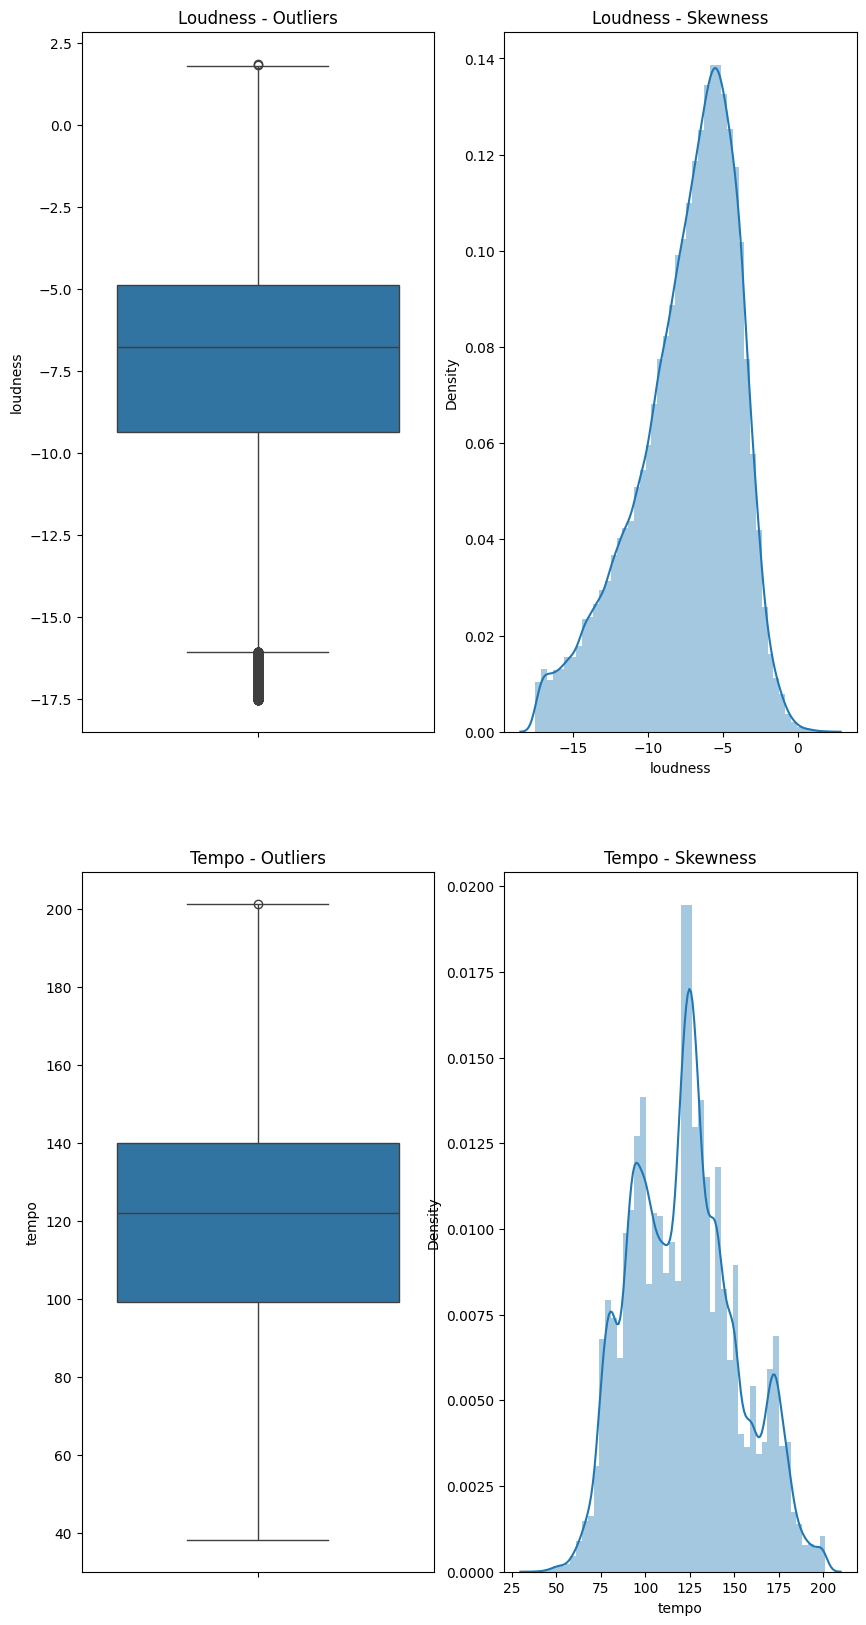

In [32]:
fig,axes = plt.subplots(2,2, figsize=(10,20))

# Loudness
sns.boxplot(ax=axes[0,0], data = df['loudness'])
axes[0,0].set_title('Loudness - Outliers')
sns.distplot(ax=axes[0,1], a=df['loudness'])
axes[0,1].set_title('Loudness - Skewness')

# Tempo
sns.boxplot(ax=axes[1,0], data=df['tempo'])
axes[1,0].set_title('Tempo - Outliers')
sns.distplot(ax=axes[1,1], a=df['tempo'])
axes[1,1].set_title('Tempo - Skewness')

In [33]:
df['loudness'].fillna(df['loudness'].mean(), inplace=True)
df['tempo'].fillna(df['tempo'].mean(), inplace=True)

In [34]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_seconds    0
dtype: int64

In [35]:
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_seconds
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,230.666
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,198.853
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,1,214240,False,0.688,0.4810,6,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,214.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113276,4YFy1VOf7pV1PF6rSxiz1v,Phil Wickham;Chandler Moore;Maverick City Musi...,Worthy of My Song (Worthy of It All),Worthy of My Song (Worthy of It All),1,506796,False,0.260,0.6220,2,...,1,0.0417,0.1280,0.000000,0.6440,0.2310,139.002,4,world-music,506.796
113281,7zJg7aNCvTKW9EtG1Dvzkl,for KING & COUNTRY,RUN WILD. LIVE FREE. LOVE STRONG. (Deluxe Anni...,Fix My Eyes,1,215933,False,0.587,0.7390,0,...,1,0.0365,0.0539,0.000002,0.0490,0.5490,100.005,4,world-music,215.933
113454,1d6BkMki9M6K0yp9OLBzOM,Actress,Karma & Desire,Fire and Light,1,75969,False,0.337,0.2800,0,...,0,0.0384,0.9870,0.882000,0.0851,0.0824,140.004,4,world-music,75.969
113489,0uryoZxnSimQVSFnGhyqxU,Rend Collective,Whosoever,Hallelujah Anyway,1,225755,False,0.494,0.8570,8,...,1,0.0379,0.0019,0.000008,0.1320,0.4670,129.994,4,world-music,225.755


# Modeling

In [36]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_seconds
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,198.853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,0,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,384.999
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,0,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,385.000
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,0,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,271.466
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,0,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,283.893


**Encoding Explicit col**

In [37]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
le = LabelEncoder()

# Apply label encoding to the 'explicit' column
df['explicit'] = le.fit_transform(df['explicit'].astype(str))

In [38]:
ndf = df.copy()

In [39]:
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [40]:
X = ndf[['duration_seconds', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = ndf['popularity']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

scaler = StandardScaler()
X_train= scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [41]:
X_train[0]

array([-3.01517186e-01, -3.07361643e-01,  1.10257314e+00,  2.71758845e-01,
        2.79946836e-01, -3.64146667e-01, -9.24444430e-01, -4.95001392e-01,
       -6.91901752e-01,  6.59245211e-01, -8.94800227e-04,  2.20812322e-01])

In [42]:
models2 = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier()]

for model in models2:
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, train_pred)
    accuracy_test = accuracy_score(y_test, test_pred)
    
    cm_train = confusion_matrix(y_train, train_pred)
    cm_test = confusion_matrix(y_test, test_pred)
    
    print(f"**********{model} Train***********")
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Train Confusion Matrix:\n{cm_train}")
    
    print(f"**********{model} Test***********")
    print(f"Test Accuracy: {accuracy_test}")
    print(f"Test Confusion Matrix:\n{cm_test}")

**********LogisticRegression() Train***********
Train Accuracy: 0.8326845689097468
Train Confusion Matrix:
[[75937     3]
 [15256     3]]
**********LogisticRegression() Test***********
Test Accuracy: 0.835701754385965
Test Confusion Matrix:
[[19054     0]
 [ 3746     0]]
**********DecisionTreeClassifier() Train***********
Train Accuracy: 0.9932126448754921
Train Confusion Matrix:
[[75867    73]
 [  546 14713]]
**********DecisionTreeClassifier() Test***********
Test Accuracy: 0.846140350877193
Test Confusion Matrix:
[[17095  1959]
 [ 1549  2197]]
**********RandomForestClassifier() Train***********
Train Accuracy: 0.9931907148104694
Train Confusion Matrix:
[[75805   135]
 [  486 14773]]
**********RandomForestClassifier() Test***********
Test Accuracy: 0.9094298245614035
Test Confusion Matrix:
[[18898   156]
 [ 1909  1837]]
**********GradientBoostingClassifier() Train***********
Train Accuracy: 0.8328161492998827
Train Confusion Matrix:
[[75939     1]
 [15246    13]]
**********GradientBoo

# Hyperparameter Tuning Random Forest

In [43]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_

y_pred_hpt_train = grid_search.predict(X_train)
y_pred_hpt_test = grid_search.predict(X_test)

acc_hpt_train = accuracy_score(y_train, y_pred_hpt_train)
acc_hpt_test = accuracy_score(y_test, y_pred_hpt_test)

print("Best Random Forest Model:")
print(f"Best Hyperparameters: {best_parameters}")
print(f"Final Accuracy Train: {acc_hpt_train}")
print(f"Final Accuracy Test: {acc_hpt_test}")

In [ ]:
rf_cls = RandomForestClassifier(max_depth = None , min_samples_split = 6, n_estimators = 200)
rf_cls.fit(X_train, y_train)

In [ ]:
x_pred=rf_cls.predict(x_train)
y_pred=rf_cls.predict(x_test)

In [ ]:
print("Training accuracy")
accuracy_score(y_train, x_pred)

In [ ]:
print("---------------------------------")
print("Training accuracy")
accuracy_score(y_test, y_pred)

In [ ]:
# Testing Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, x_pred))
print("Classification Report:")
print(classification_report(y_train, x_pred))

In [ ]:
# Testing Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='BuPu',annot=True,fmt='.5g')
plt.xlabel('Actuals')
plt.ylabel('Predicted',rotation=0)
plt.show()

In [ ]:
probs = rf_cls.predict_proba(X_train)[:, 1]  # Extracting probabilities for the positive class
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
probs = rf_cls.predict_proba(X_test)[:, 1]  # Extracting probabilities for the positive class
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
import pickle
with open('spotify_ClassifierModel_Finalproject.pkl', 'wb') as file:
    pickle.dump(rf_cls, file)

with open('spotify_StandardScaler_Finalproject.pkl','wb') as files:
    pickle.dump(scaler,files)

In [ ]:
import pickle
with open('spotify_ClassifierModel_Finalproject.pkl','rb') as file:
    cls= pickle.load(file)
with open('spotify_StandardScaler_Finalproject.pkl','rb') as files:
    std_scaler= pickle.load(files)

In [ ]:
X_test[2155]

In [ ]:
y_pred_hpt_test[2155]

In [ ]:
array=[[-0.33175225,  3.25939103, -0.31254917,  1.17898897,  0.34720212,
       -0.37756056, -0.94537731, -0.49239248,  1.06541023,  0.0357441 ,
        0.61843286,  0.22058384]]
result=cls.predict(array)
print(result) 

In [ ]:
X_test[100]

In [ ]:
y_pred_hpt_test[100]

In [ ]:
array=[[ 0.24060047, -0.30680578, -0.62985056, -0.51942638, -1.82458962,
       -0.41925256, -0.44295931, -0.50415776, -0.73109943,  0.94592636,
        1.86012904,  0.22058384]]
result=cls.predict(array)
print(result) 

In [ ]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 187.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/282.6 kB 196.9 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/282.6 kB 375.8 kB/s eta 0:00:01
   -------------------------- ----------- 194.6/282.6 kB 737.3 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 920.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
